In [307]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from IPython.display import HTML


In [308]:
# Menentukan variabel yang diperlukan untuk sympy
t, m, g, L1, L2, w, C, alpha, beta = smp.symbols(r't m g L_1 L_2 \omega C \alpha \beta')

In [309]:
# Mendefinisikan theta 1 dan theta 2 dan menyatakan fungsi waktu. Juga definisi turunan pertama dan kedua.
theta1, theta2 = smp.symbols(r'\theta_1 \theta_2', cls=smp.Function)

In [310]:
theta1 = theta1(t)
theta1_d = smp.diff(theta1, t)
theta1_dd = smp.diff(theta1_d, t)

In [311]:
theta2 = theta2(t)
theta2_d = smp.diff(theta2, t)
theta2_dd = smp.diff(smp.diff(theta2, t),t)

In [312]:
# Mendeklarasikan nilai x1(teta1), y1(teta1) dan x2(teta1, teta2), y2(teta1, teta2)
x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
x1 = x1(t, theta1)
y1 = y1(t, theta1)
x2 = x2(t, theta1, theta2)
y2 = y2(t, theta1, theta2)


In [313]:
# Masukkan ke dalam bentuk fungsional spesifik dari x1,y1, x2,y2
x1 = smp.cos(w*t)+L1*smp.sin(theta1)
y1 = -L1*smp.cos(theta1)
x2 = smp.cos(w*t)+L1*smp.sin(theta1)+L2*smp.sin(theta2)
y2 = -L1*smp.cos(theta1)-L2*smp.cos(theta2)

In [314]:
# Definisi fungsi numerik dari vx1, vy1, vx2, vy2
smp.diff(x1, t)

L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) - \omega*sin(\omega*t)

In [315]:
# Fungsi untuk menghitung kecepatan pada sumbu x untuk benda 1 dan 2
vx1_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(x1, t))
vx2_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(x2, t))
vy1_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(y1, t))
vy2_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(y2, t))

In [316]:
# Rumus Lagrange
T = 1/2 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2) + \
    1/2 * m * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
V = g*y1 + m*g*y2
L = T - V

In [317]:
# Persamaan Lagrange-Euler untuk theta1
LE1 = smp.diff(L, theta1) - smp.diff(L, theta1_d, t)
LE1 = LE1.simplify()

In [318]:
# Persamaan Lagrange-Euler untuk theta2
LE2 = smp.diff(L, theta2) - smp.diff(L, theta2_d, t)
LE2 = LE2.simplify()

In [319]:
LE1

1.0*L_1*(-L_1*m*Derivative(\theta_1(t), (t, 2)) - L_1*Derivative(\theta_1(t), (t, 2)) - L_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - L_2*m*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + \omega**2*m*cos(\omega*t)*cos(\theta_1(t)) + \omega**2*cos(\omega*t)*cos(\theta_1(t)) - g*m*sin(\theta_1(t)) - g*sin(\theta_1(t)))

In [320]:
LE2

1.0*L_2*m*(L_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - L_1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - L_2*Derivative(\theta_2(t), (t, 2)) + \omega**2*cos(\omega*t)*cos(\theta_2(t)) - g*sin(\theta_2(t)))

In [321]:
# Menyelesaikan Persamaan
sols = smp.solve([LE1, LE2], (theta1_dd, theta2_dd),
                 simplify=False, rational=False)
sols[theta1_dd] #d^2 / dt^2 theta_1

L_1*m*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + L_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + \omega**2*m*cos(\omega*t)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_2(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - \omega**2*m*cos(\omega*t)*cos(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - \omega**2*cos(\omega*t)*cos(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + g*m*sin(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - g*m*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + g*sin(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1)

In [322]:
a = LE1.subs([(smp.sin(theta1-theta2), theta1-theta2),
              (smp.cos(theta1-theta2), 1),
              (smp.cos(theta1), 1),
              (smp.sin(theta1), theta1),
              (theta1, C*smp.cos(w*t)),
              (theta2, C*alpha*smp.cos(w*t)),
              (m, 1),
              (L2, L1),
              ]).doit().series(C, 0, 2).removeO().simplify()

b = LE2.subs([(smp.sin(theta1-theta2), theta1-theta2),
              (smp.cos(theta1-theta2), 1),
              (smp.cos(theta1), 1),
              (smp.cos(theta2), 1),
              (smp.sin(theta1), theta1),
              (smp.sin(theta2), theta2),
              (theta1, C*smp.cos(w*t)),
              (theta2, C*alpha*smp.cos(w*t)),
              (m, 1),
              (L2, L1),
              ]).doit().series(C, 0, 2).removeO().simplify()

In [323]:
yeet = smp.solve([a.args[1], b.args[2]], (w, alpha))

In [324]:
yeet[2][0]

-sqrt(-C*g*(-2.0 + 1.4142135623731*(C**2*L_1**2 + C*L_1 + 0.5)**0.5/(C*L_1) - 1/(C*L_1))/(C*L_1 + 1.0))

In [325]:
yeet[0][0]

-sqrt(-C*g*(-2.0 - 1.4142135623731*(C**2*L_1**2 + C*L_1 + 0.5)**0.5/(C*L_1) - 1/(C*L_1))/(C*L_1 + 1.0))

In [326]:
# Mengubah persamaan eksak dan memasukan ke dalam persamaan Numerik
dz1dt_f = smp.lambdify((t, m, g, w, L1, L2, theta1, theta2, theta1_d, theta2_d), sols[theta1_dd])
dtheta1dt_f = smp.lambdify(theta1_d, theta1_d)

dz2dt_f = smp.lambdify((t, m, g, w, L1, L2, theta1, theta2, theta1_d, theta2_d), sols[theta2_dd])
dtheta2dt_f = smp.lambdify(theta2_d, theta2_d)

In [327]:
# Mendefinisikan persamaan differensial fungsi S
def dSdt(S, t):
    theta1, z1, theta2, z2 = S
    return [
        dtheta1dt_f(z1),
        dz1dt_f(t, m, g, w, L1, L2, theta1, theta2, z1, z2),
        dtheta2dt_f(z2),
        dz2dt_f(t, m, g, w, L1, L2, theta1, theta2, z1, z2),
    ]


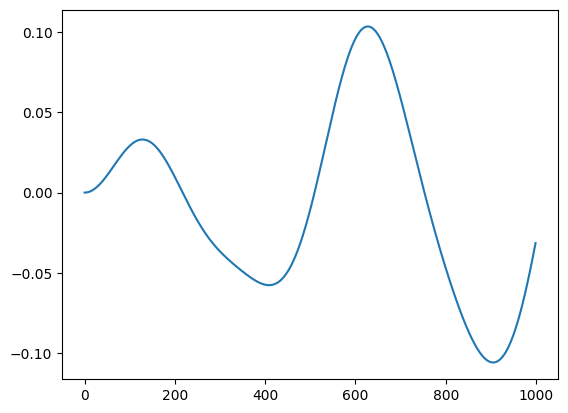

In [328]:
#Menambahkan salah satu contoh fungsi numerik untuk mendapakan nilai

t = np.linspace(0, 20, 1000)

g = 9.81

m=1

L1 = 20

L2 = 20

w = np.sqrt(g/L1)

ans = odeint(dSdt, y0=[0, 0, 0, 0], t=t)

plt.plot(ans.T[0])

In [329]:
# Membuat Persamaan energi kinetik
def get_energy(w):
    t = np.linspace(0, 100, 2000)
    ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)
    vx1 = vx1_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    vx2 = vx2_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    vy1 = vy1_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    vy2 = vy2_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    E = 1/2 * np.mean(vx1**2 + vx2**2 + vy1**2 + vy2**2)
    return E

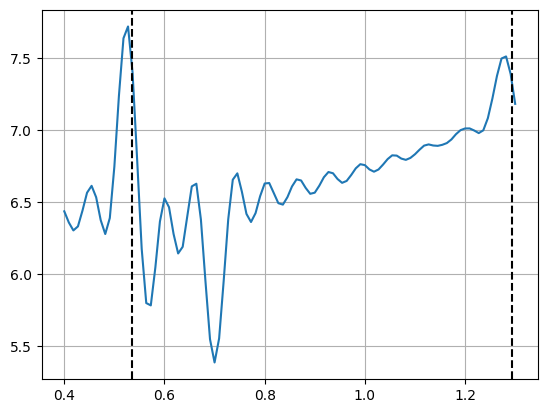

In [330]:
ws = np.linspace(0.4, 1.3, 100)
Es = np.vectorize(get_energy)(ws)

plt.plot(ws, Es)
plt.axvline(1.84775*np.sqrt(g/L1), c='k', ls='--')
plt.axvline(0.76536*np.sqrt(g/L1), c='k', ls='--')
# Tautochrone
#plt.axvline(np.sqrt(np.pi*g**(-1/2)), c='k', ls='--')
plt.grid()

<ipython-input-331-7208fecf49de>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ln2, = ax.plot([], [], 'ro-', markersize = 8, alpha=0.05, color='cyan')  # line for Earth
<ipython-input-331-7208fecf49de>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ln3, = ax.plot([], [], 'ro-', markersize = 8, alpha=0.05, color='cyan')


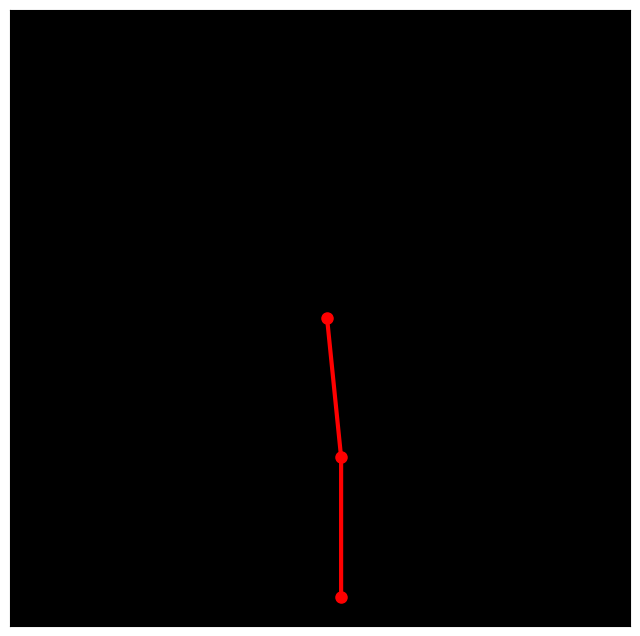

In [331]:
t = np.linspace(0, 200, 20000)
g = 9.81
m=1
L1 = 20
L2 = 20
w = ws[ws>1][np.argmax(Es[ws>1])]
ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)

def get_x0y0x1y1x2y2(t, the1, the2, L1, L2):
    return (np.cos(w*t),
            0*t,
            np.cos(w*t) + L1*np.sin(the1),
            -L1*np.cos(the1),
            np.cos(w*t) + L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2),
           )

x0, y0, x1, y1, x2, y2 = get_x0y0x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

def animate(i):
    ln1.set_data([x0[::10][i], x1[::10][i], x2[::10][i]], [y0[::10][i], y1[::10][i], y2[::10][i]])
    trail1 = 50  # Panjang jejak benda 1
    trail2 = 50  # Panjang jejak benda 2
    ln2.set_data(x1[::10][i:max(1,i-trail1):-1], y1[::10][i:max(1,i-trail1):-1])  # jejak dan garis pada benda 1
    ln3.set_data(x2[::10][i:max(1,i-trail2):-1], y2[::10][i:max(1,i-trail2):-1])  # jejak dan garis pada benda 2

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])  # menyembunyikan garis sumbu x
ax.get_yaxis().set_ticks([])  # menyembunyikan garis sumbu y
ln1, = plt.plot([], [], 'ro-', lw=3, markersize=8)
ln2, = ax.plot([], [], 'ro-', markersize = 8, alpha=0.05, color='cyan')  # line for Earth
ln3, = ax.plot([], [], 'ro-', markersize = 8, alpha=0.05, color='cyan')
ax.set_ylim(-44,44)
ax.set_xlim(-44,44)

#Animasi gerak double pendulum
ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
#ani.save('pen.gif',writer='pillow',fps=50)
HTML(ani.to_html5_video())